In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, DBSCAN, MeanShift
from sklearn.metrics import silhouette_score
import random
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
random.seed(42)
import openpyxl
from sklearn.pipeline import Pipeline
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import Birch

In [220]:
# Load the Excel file
Excel_file = openpyxl.load_workbook(r"C:\Users\gabri\Downloads\Co2-Emission-Data.xlsx")

In [221]:
CO2_worksheet = Excel_file.active

In [222]:
CO2_worksheet.merge_cells('A1:A2')
CO2_worksheet.merge_cells('B1:B2')
CO2_worksheet.merge_cells('C1:C2')
CO2_worksheet.merge_cells('D1:D2')
CO2_worksheet.merge_cells('E1:E2')
CO2_worksheet.merge_cells('F1:F2')
CO2_worksheet.merge_cells('G1:G2')
CO2_worksheet.merge_cells('H1:H2')
CO2_worksheet.merge_cells('I1:I2')
CO2_worksheet.merge_cells('J1:J2')
CO2_worksheet.merge_cells('K1:K2')
CO2_worksheet.merge_cells('L1:L2')
CO2_worksheet.merge_cells('M1:M2')

In [223]:
CO2_worksheet['A1'] = 'MODEL YEAR'
CO2_worksheet['B1'] = 'MAKE'
CO2_worksheet['C1'] = 'MODEL (# = high output engine)'
CO2_worksheet['D1'] = 'VEHICLE CLASS'
CO2_worksheet['E1'] = 'ENGINE SIZE (L)'
CO2_worksheet['F1'] = 'CYLINDERS'
CO2_worksheet['G1'] = 'TRANSMISSION'
CO2_worksheet['H1'] = 'FUEL TYPE'
CO2_worksheet['I1'] = 'FUEL CONSUMPTION CITY (L/100 km)'
CO2_worksheet['J1'] = 'FUEL CONSUMPTION HWY (L/100 km)'
CO2_worksheet['K1'] = 'FUEL CONSUMPTION COMB (L/100 km)'
CO2_worksheet['L1'] = 'FUEL CONSUMPTION COMB (mpg)'
CO2_worksheet['M1'] = 'CO2 EMISSIONS (g/km)'

In [224]:
Excel_file.save(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.xlsx")

In [225]:
df = pd.read_excel(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.xlsx")

In [226]:
df.to_csv(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.csv", index=False)

In [227]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\Co2-Emission-Data_Header_Adjustment.csv")

In [228]:
df = df.drop(0).reset_index(drop=True)

In [229]:
df.head()

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
0,2000.0,ACURA,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0
1,2000.0,ACURA,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0
2,2000.0,ACURA,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0
3,2000.0,ACURA,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0
4,2000.0,ACURA,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0


In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        14253 non-null  float64
 1   MAKE                              14253 non-null  object 
 2   MODEL (# = high output engine)    14253 non-null  object 
 3   VEHICLE CLASS                     14253 non-null  object 
 4   ENGINE SIZE (L)                   14253 non-null  float64
 5   CYLINDERS                         14253 non-null  float64
 6   TRANSMISSION                      14253 non-null  object 
 7   FUEL TYPE                         14253 non-null  object 
 8   FUEL CONSUMPTION CITY (L/100 km)  14253 non-null  float64
 9   FUEL CONSUMPTION HWY (L/100 km)   14253 non-null  float64
 10  FUEL CONSUMPTION COMB (L/100 km)  14253 non-null  float64
 11  FUEL CONSUMPTION COMB (mpg)       14253 non-null  float64
 12  CO2 

In [231]:
df.describe(include='all')

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km)
count,14253.000000,14253,14253,14253,14253.000000,14253.000000,14253,14253,14253.000000,14253.000000,14253.000000,14253.000000,14253.000000
unique,NaN,51,2518,17,NaN,NaN,24,5,NaN,NaN,NaN,NaN,NaN
top,NaN,CHEVROLET,JETTA,SUV,NaN,NaN,A4,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,1464,74,2640,NaN,NaN,3499,7798,NaN,NaN,NaN,NaN,NaN
mean,2007.591875,NaN,NaN,NaN,3.477850,5.991230,NaN,NaN,12.934456,8.831348,11.089637,27.285624,248.790149
std,4.132870,NaN,NaN,NaN,1.311102,1.774154,NaN,NaN,3.541439,2.338169,2.969484,7.425910,59.077190
min,2000.000000,NaN,NaN,NaN,0.800000,2.000000,NaN,NaN,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2004.000000,NaN,NaN,NaN,2.400000,4.000000,NaN,NaN,10.600000,7.200000,9.100000,22.000000,209.000000
50%,2008.000000,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.400000,8.300000,10.500000,27.000000,239.000000
75%,2011.000000,NaN,NaN,NaN,4.400000,8.000000,NaN,NaN,14.900000,10.200000,12.800000,31.000000,285.000000


# NOTES: WHAT TO LOOK FOR WHEN CHOOSING FEATURES

Relevance to the Problem

Exclude highly correlated variables, as they may provide redundant information

Select variables that have a significant impact on the overall variability of the data (High standard deviation)

In [232]:
vehicle_percentage = df['VEHICLE CLASS'].value_counts(normalize=True) * 100
vehicle_percentage

VEHICLE CLASS
SUV                         18.522416
COMPACT                     14.803901
MID-SIZE                    12.418438
PICKUP TRUCK - STANDARD     10.524100
SUBCOMPACT                   9.106855
FULL-SIZE                    5.760191
TWO-SEATER                   5.542693
MINICOMPACT                  4.406090
STATION WAGON - SMALL        4.349961
VAN - CARGO                  2.329334
PICKUP TRUCK - SMALL         2.294254
MINIVAN                      2.294254
STATION WAGON - MID-SIZE     2.245141
SUV - SMALL                  2.062724
VAN - PASSENGER              1.782081
SUV - STANDARD               1.445310
SPECIAL PURPOSE VEHICLE      0.112257
Name: proportion, dtype: float64

In [233]:
make_percentage = df['MAKE'].value_counts(normalize=True) * 100
make_percentage

MAKE
CHEVROLET        10.271522
FORD              7.079211
GMC               6.756472
BMW               6.307444
MERCEDES-BENZ     5.318179
DODGE             4.735845
TOYOTA            4.349961
VOLKSWAGEN        3.585210
NISSAN            3.458921
PORSCHE           3.437873
AUDI              3.346664
MAZDA             2.785379
VOLVO             2.638041
SUBARU            2.581913
CHRYSLER          2.406511
HONDA             2.252157
HYUNDAI           2.238125
KIA               2.006595
CADILLAC          1.824177
JEEP              1.789097
PONTIAC           1.775065
LEXUS             1.747001
MITSUBISHI        1.620711
JAGUAR            1.487406
SUZUKI            1.396197
MINI              1.375149
SAAB              1.333053
INFINITI          1.255876
ACURA             1.192731
BUICK             1.171683
SATURN            1.094506
LINCOLN           0.884024
LAND ROVER        0.631446
FERRARI           0.512173
BENTLEY           0.434996
ASTON MARTIN      0.385884
LAMBORGHINI       0.357

In [234]:
model_percentage = df['MODEL (# = high output engine)'].value_counts(normalize=True) * 100
model_percentage

MODEL (# = high output engine)
JETTA                   0.519189
MUSTANG                 0.491125
RANGER                  0.427980
F150                    0.392900
ALTIMA                  0.364835
                          ...   
911 GT3RS 4.0           0.007016
SAFARI AWD PASSENGER    0.007016
SAFARI AWD CARGO        0.007016
911 SPEEDSTER           0.007016
GL 450                  0.007016
Name: proportion, Length: 2518, dtype: float64

In [235]:
transmission_percentage = df['TRANSMISSION'].value_counts(normalize=True) * 100
transmission_percentage

TRANSMISSION
A4     24.549218
M5     13.674314
M6     11.913281
AS6    11.267803
A5      9.583947
A6      9.387497
AS5     5.928576
AV      3.402792
AS7     2.504736
AS4     1.711920
A7      1.634744
A8      1.319021
AS8     1.199747
AM7     0.799832
AM6     0.491125
A3      0.168386
M7      0.147337
AV6     0.126289
AV7     0.056129
A9      0.056129
AV8     0.028064
AM5     0.028064
AS9     0.014032
M4      0.007016
Name: proportion, dtype: float64

In [236]:
fuel_type_percentage = df['FUEL TYPE'].value_counts(normalize=True) * 100
fuel_type_percentage

FUEL TYPE
X    54.711289
Z    38.925139
E     5.367291
D     0.771767
N     0.224514
Name: proportion, dtype: float64

WE OBSERVE THAT FUEL TYPE LACKS VARIABILITY, AS FUEL TYPES "X" AND "Z" CONSTITUTE 86%+ OF THE TOTAL COUNT OF VARIABLES

In [237]:
df.columns

Index(['MODEL YEAR', 'MAKE', 'MODEL (# = high output engine)', 'VEHICLE CLASS',
       'ENGINE SIZE (L)', 'CYLINDERS', 'TRANSMISSION', 'FUEL TYPE',
       'FUEL CONSUMPTION CITY (L/100 km)', 'FUEL CONSUMPTION HWY (L/100 km)',
       'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)',
       'CO2 EMISSIONS (g/km)'],
      dtype='object')

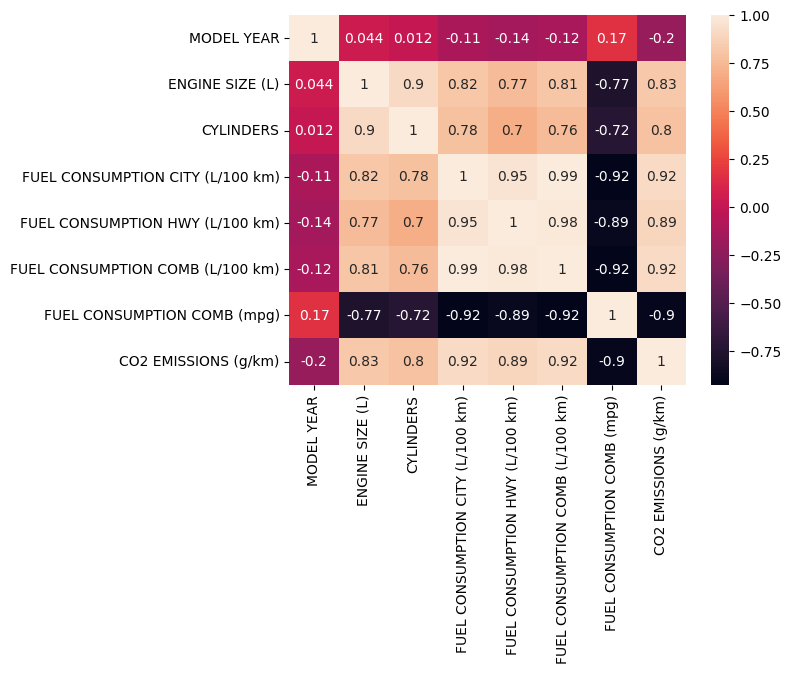

In [238]:
numerical_variables_df = df[['MODEL YEAR', 'ENGINE SIZE (L)', 'CYLINDERS', 'FUEL CONSUMPTION CITY (L/100 km)','FUEL CONSUMPTION HWY (L/100 km)', 'FUEL CONSUMPTION COMB (L/100 km)', 'FUEL CONSUMPTION COMB (mpg)', 'CO2 EMISSIONS (g/km)']]
correlation_matrix = numerical_variables_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Engine size , cylinders, city, hwy, comb (L/100km), co2 Emission seems to have all high correlation

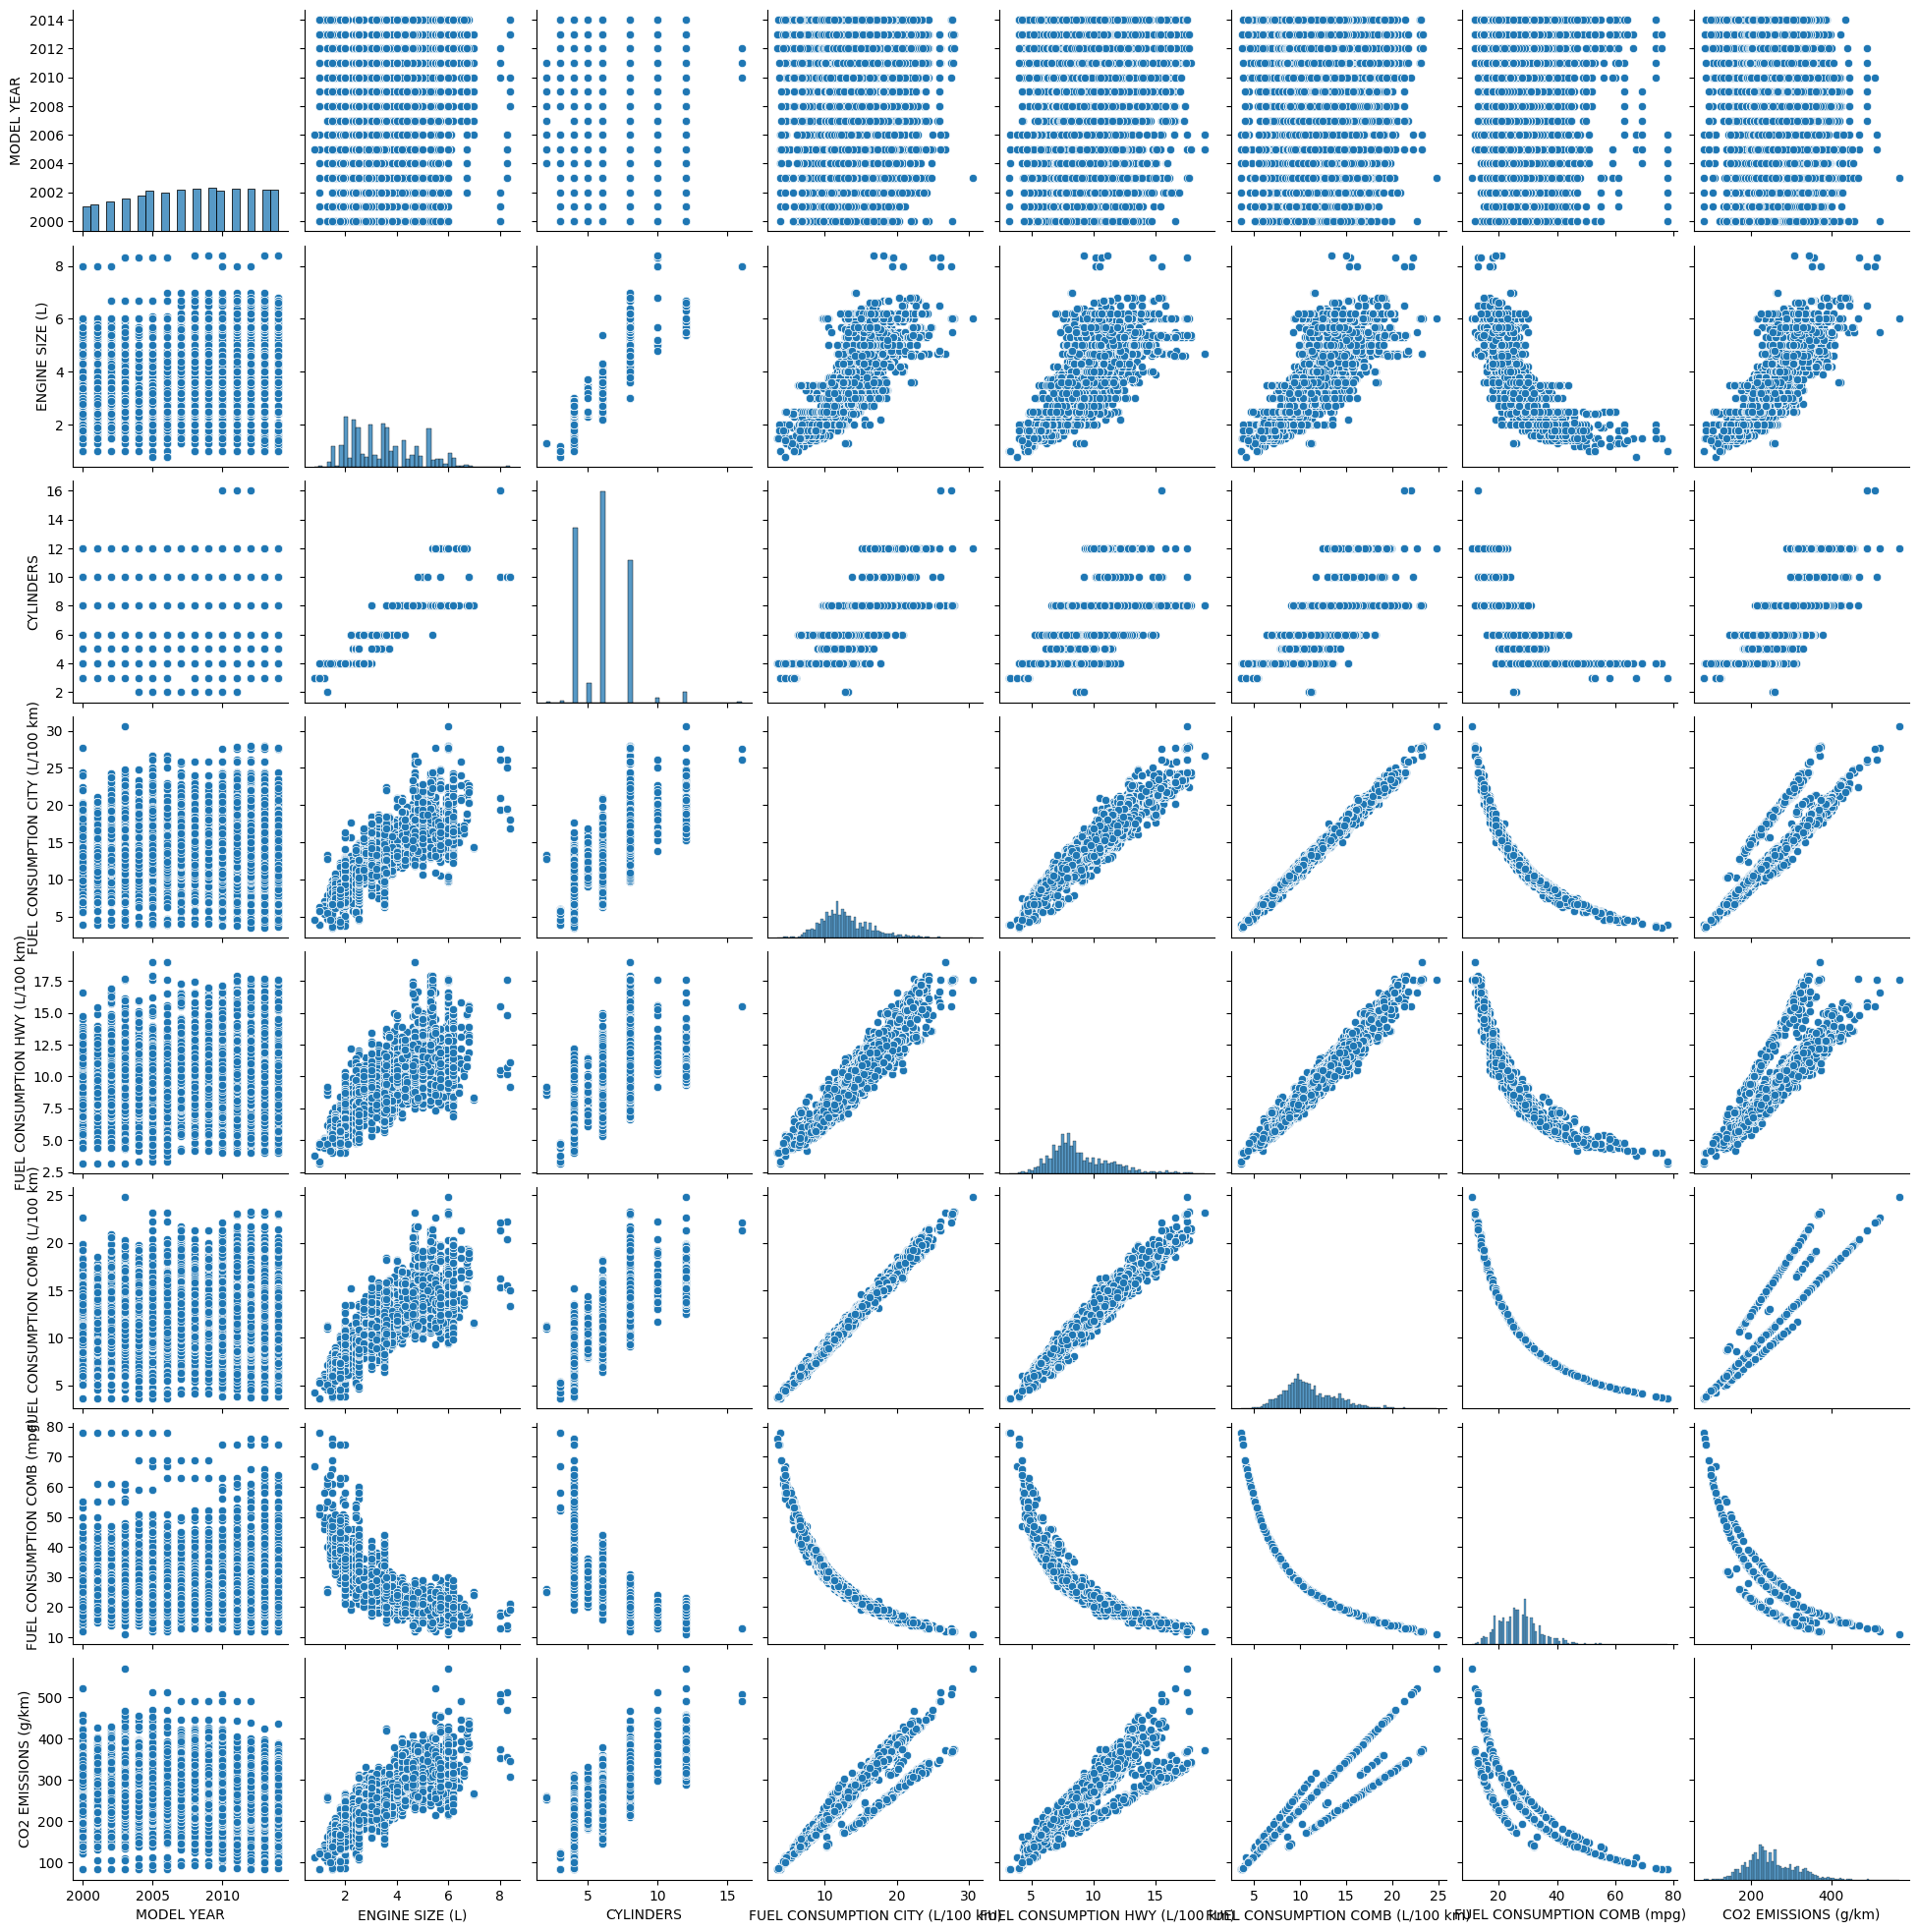

In [239]:
sns.pairplot(numerical_variables_df)

In [240]:
numerical_variables_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MODEL YEAR                        14253 non-null  float64
 1   ENGINE SIZE (L)                   14253 non-null  float64
 2   CYLINDERS                         14253 non-null  float64
 3   FUEL CONSUMPTION CITY (L/100 km)  14253 non-null  float64
 4   FUEL CONSUMPTION HWY (L/100 km)   14253 non-null  float64
 5   FUEL CONSUMPTION COMB (L/100 km)  14253 non-null  float64
 6   FUEL CONSUMPTION COMB (mpg)       14253 non-null  float64
 7   CO2 EMISSIONS (g/km)              14253 non-null  float64
dtypes: float64(8)
memory usage: 890.9 KB


<Axes: ylabel='FUEL CONSUMPTION COMB (mpg)'>

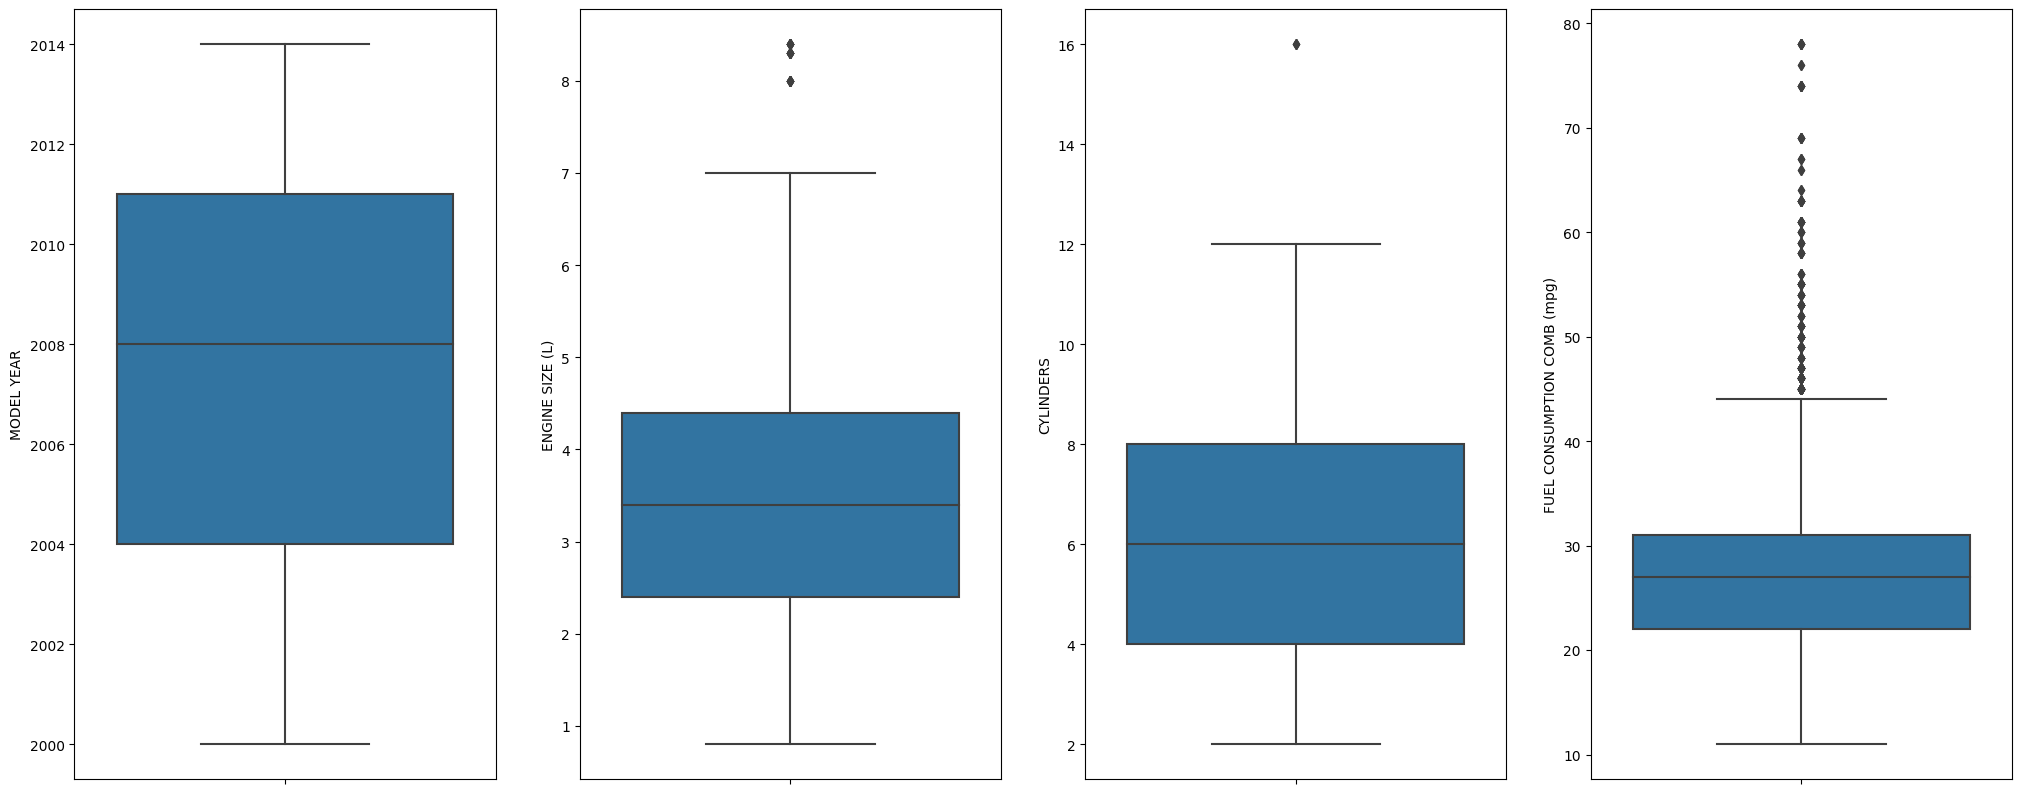

In [241]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(25,10))
sns.boxplot(y='MODEL YEAR', data=df, ax=ax1)
sns.boxplot(y='ENGINE SIZE (L)', data=df, ax=ax2)
sns.boxplot(y='CYLINDERS', data=df, ax=ax3)
sns.boxplot(y='FUEL CONSUMPTION COMB (mpg)', data=df, ax=ax4)

<Axes: ylabel='CO2 EMISSIONS (g/km)'>

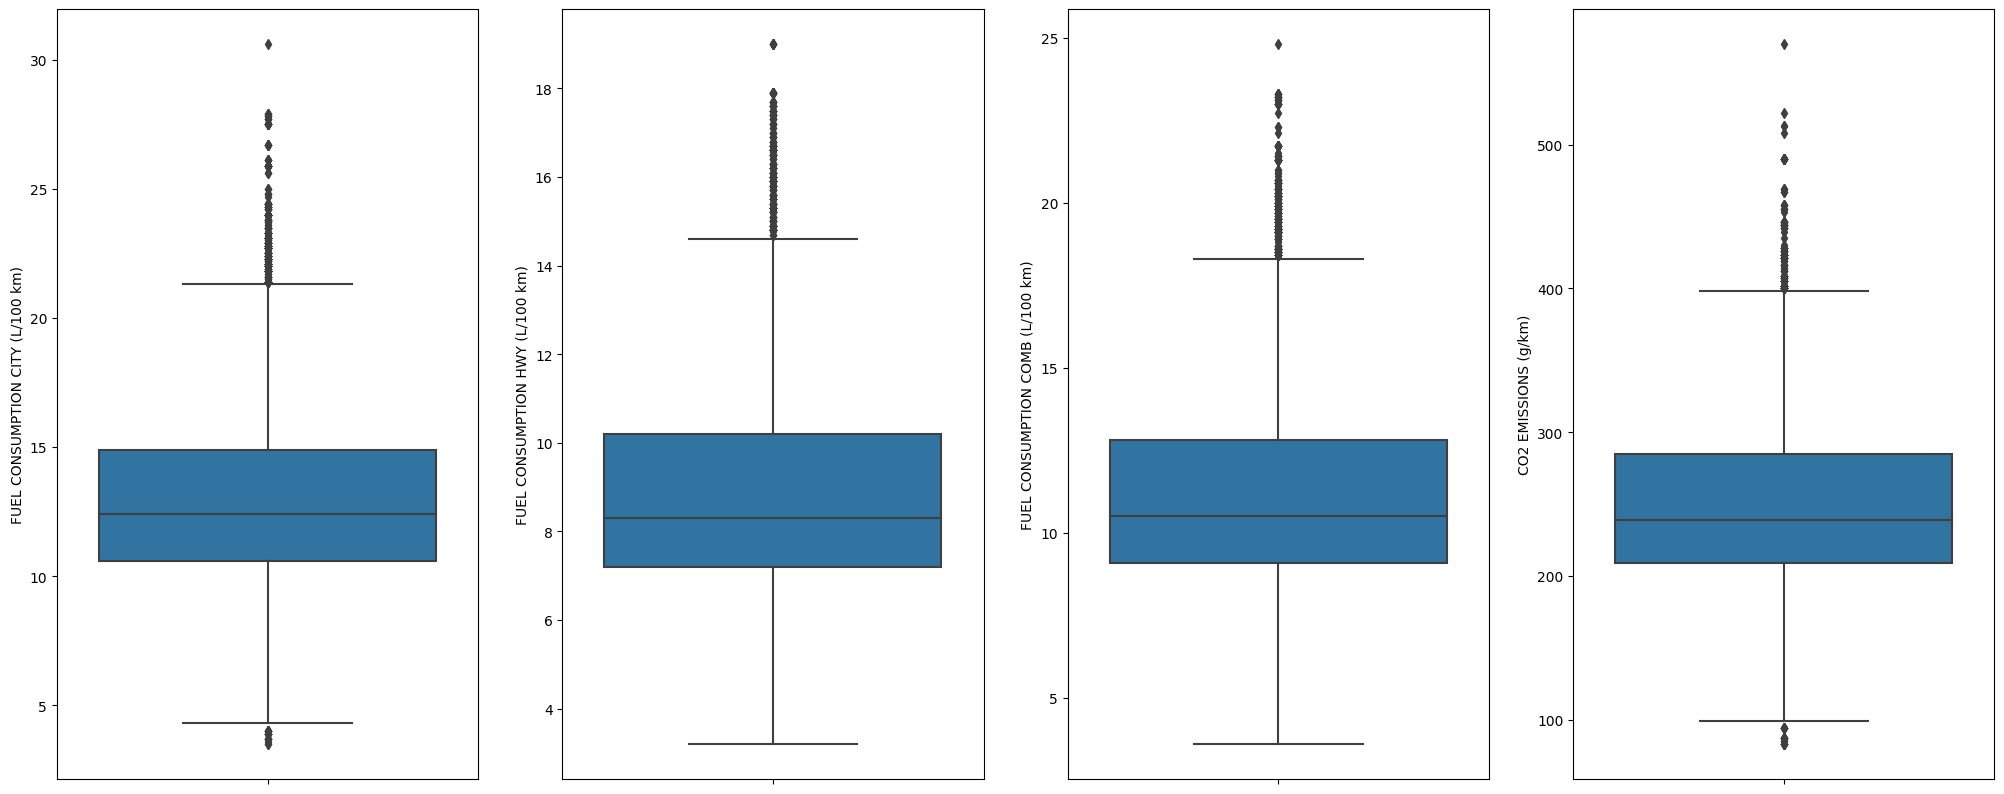

In [242]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(25,10))
sns.boxplot(y='FUEL CONSUMPTION CITY (L/100 km)', data=df, ax=ax1)
sns.boxplot(y='FUEL CONSUMPTION HWY (L/100 km)', data=df, ax=ax2)
sns.boxplot(y='FUEL CONSUMPTION COMB (L/100 km)', data=df, ax=ax3)
sns.boxplot(y='CO2 EMISSIONS (g/km)', data=df, ax=ax4)

Presence of outliers. Clustering methods are sensitive to outliers therefore outliers ought to be removed

In [243]:
df = df[(df['FUEL CONSUMPTION CITY (L/100 km)'] <= 20) & (df['FUEL CONSUMPTION HWY (L/100 km)'] <= 14) & (df['FUEL CONSUMPTION COMB (L/100 km)'] <= 17) & (df['CO2 EMISSIONS (g/km)'] <= 390) & (df['FUEL CONSUMPTION COMB (mpg)'] <= 42)]

<Axes: ylabel='FUEL CONSUMPTION COMB (mpg)'>

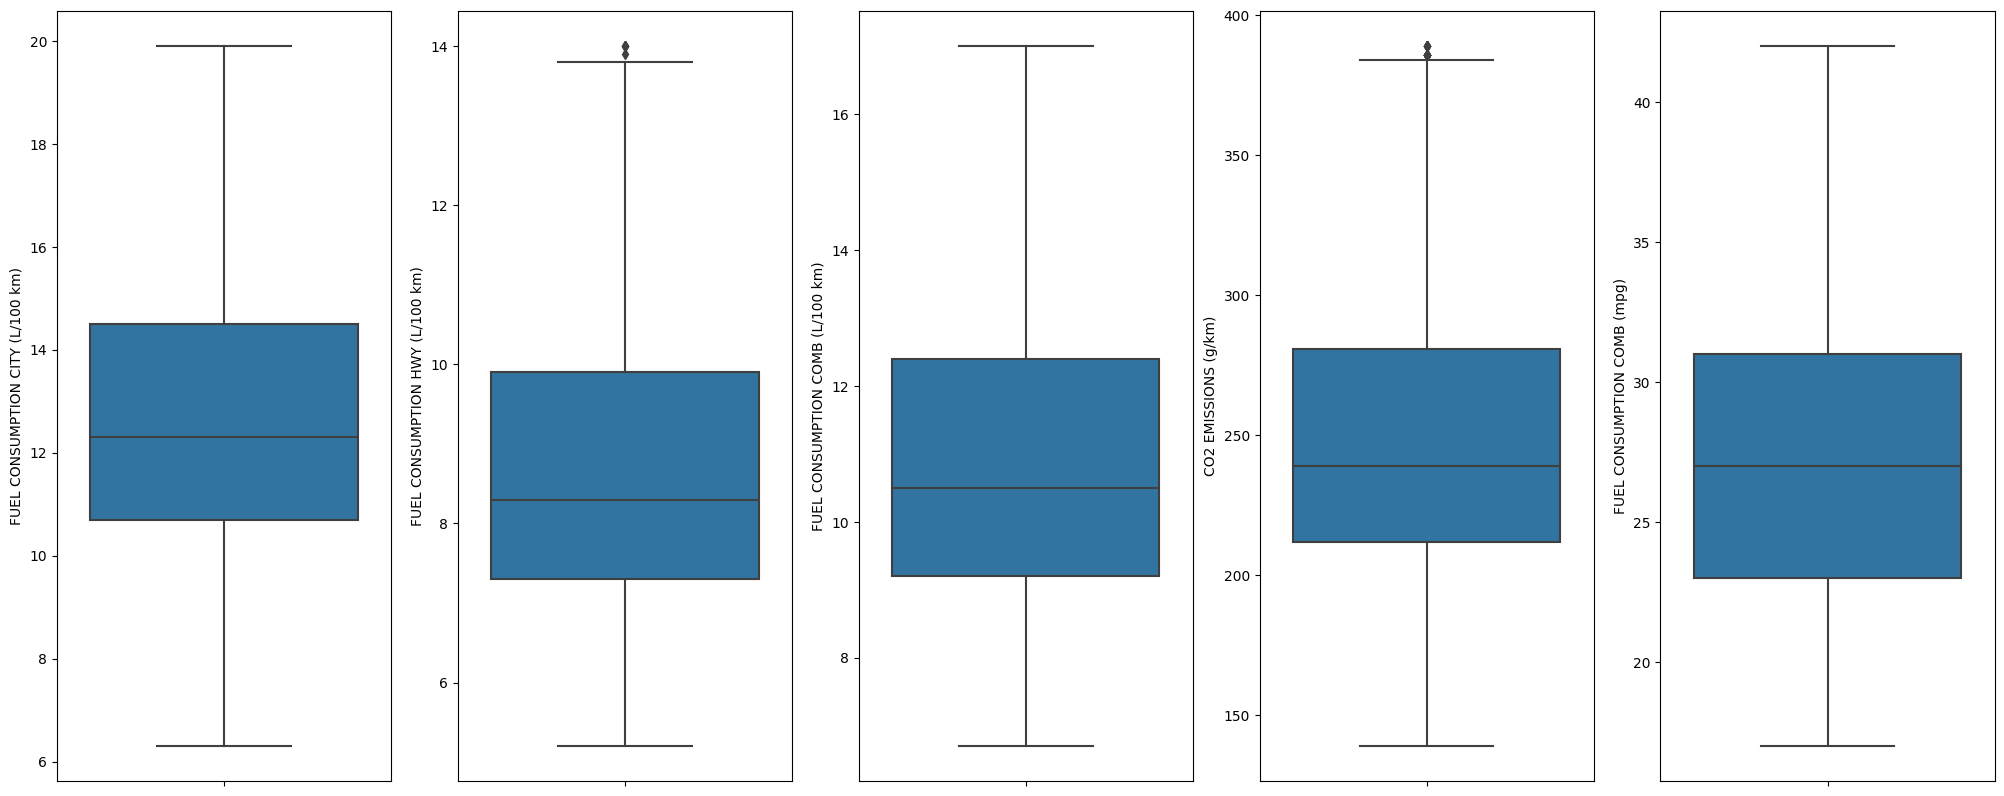

In [244]:
fig, (ax1, ax2, ax3, ax4,ax5) = plt.subplots(1,5, figsize=(25,10))
sns.boxplot(y='FUEL CONSUMPTION CITY (L/100 km)', data=df, ax=ax1)
sns.boxplot(y='FUEL CONSUMPTION HWY (L/100 km)', data=df, ax=ax2)
sns.boxplot(y='FUEL CONSUMPTION COMB (L/100 km)', data=df, ax=ax3)
sns.boxplot(y='CO2 EMISSIONS (g/km)', data=df, ax=ax4)
sns.boxplot(y='FUEL CONSUMPTION COMB (mpg)', data=df, ax=ax5)

# CONDENSING CATEGORICAL VARIABLES

In [245]:
top_10_canadian_car_brands = ['FORD', 'TOYOTA', 'CHEVROLET', 'HYUNDAI', 'HONDA', 'GMC', 'NISSAN', 'KIA', 'MAZDA', 'VOLKSWAGEN']

other_brands = 'OTHER'

df['MAKE'] = df['MAKE'].apply(lambda x: x if x in top_10_canadian_car_brands else other_brands)

In [246]:
def categorize_model(model_name):
    if isinstance(model_name, str):  # Check if the value is a string
        if '4WD' in model_name or '4X4' in model_name or 'AWD' in model_name:
            return 'Drive Type'
        elif 'CNG' in model_name or 'FFV' in model_name or 'NGV' in model_name:
            return 'Alternative Fuels'
        elif '#' in model_name:
            return 'High Output Engine and Performance'
    return 'Others'
    
df['Model_Category'] = df['MODEL (# = high output engine)'].apply(categorize_model)

# VARIABLES SELECTED

MAKE

MODEL CATEGORY

ENGINE SIZE (L)

COMB (L/100 km)

CO2 EMISSIONS(g/km)

In [247]:
df.head()

,MODEL YEAR,MAKE,MODEL (# = high output engine),VEHICLE CLASS,ENGINE SIZE (L),CYLINDERS,TRANSMISSION,FUEL TYPE,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),FUEL CONSUMPTION COMB (mpg),CO2 EMISSIONS (g/km),Model_Category
0,2000.0,OTHER,1.6EL,COMPACT,1.6,4.0,A4,X,9.2,6.7,8.1,35.0,186.0,Others
1,2000.0,OTHER,1.6EL,COMPACT,1.6,4.0,M5,X,8.5,6.5,7.6,37.0,175.0,Others
2,2000.0,OTHER,3.2TL,MID-SIZE,3.2,6.0,AS5,Z,12.2,7.4,10.0,28.0,230.0,Others
3,2000.0,OTHER,3.5RL,MID-SIZE,3.5,6.0,A4,Z,13.4,9.2,11.5,25.0,264.0,Others
4,2000.0,OTHER,INTEGRA,SUBCOMPACT,1.8,4.0,A4,X,10.0,7.0,8.6,33.0,198.0,Others


# Checking Numerical Variable Breakdown

In [248]:
df.groupby('MAKE')['CO2 EMISSIONS (g/km)'].mean().reset_index(name='Average CO2 EMISSIONS').sort_values(by='Average CO2 EMISSIONS', ascending=False)

,MAKE,Average CO2 EMISSIONS
2,GMC,298.260430
0,CHEVROLET,265.946625
1,FORD,259.632787
8,OTHER,245.659489
7,NISSAN,240.928118
9,TOYOTA,235.708178
6,MAZDA,226.721622
10,VOLKSWAGEN,213.296296
4,HYUNDAI,210.769759
3,HONDA,210.281853


In [249]:
df.groupby('MAKE')['ENGINE SIZE (L)'].mean().reset_index(name='Average ENGINE SIZE (L)').sort_values(by='Average ENGINE SIZE (L)', ascending=False)

,MAKE,Average ENGINE SIZE (L)
2,GMC,4.722377
0,CHEVROLET,4.143956
1,FORD,3.671366
8,OTHER,3.388672
7,NISSAN,3.223890
9,TOYOTA,3.154089
3,HONDA,2.650193
6,MAZDA,2.552703
4,HYUNDAI,2.546392
5,KIA,2.445353


In [250]:
df.groupby('MAKE')['FUEL CONSUMPTION COMB (L/100 km)'].mean().reset_index(name='Average FUEL CONSUMPTION COMB (L/100 km)').sort_values(by='Average FUEL CONSUMPTION COMB (L/100 km)', ascending=False)

,MAKE,Average FUEL CONSUMPTION COMB (L/100 km)
2,GMC,13.326928
0,CHEVROLET,11.944976
1,FORD,11.588087
8,OTHER,10.758499
7,NISSAN,10.475899
9,TOYOTA,10.250186
6,MAZDA,9.915135
10,VOLKSWAGEN,9.268627
4,HYUNDAI,9.163574
3,HONDA,9.143629


In [251]:
selected_features = ['MAKE', 'Model_Category','ENGINE SIZE (L)', 'FUEL CONSUMPTION COMB (L/100 km)', 'CO2 EMISSIONS (g/km)']

In [252]:
X = df[selected_features]

In [253]:
X

,MAKE,Model_Category,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km)
0,OTHER,Others,1.6,8.1,186.0
1,OTHER,Others,1.6,7.6,175.0
2,OTHER,Others,3.2,10.0,230.0
3,OTHER,Others,3.5,11.5,264.0
4,OTHER,Others,1.8,8.6,198.0
...,...,...,...,...,...
14248,OTHER,Drive Type,3.0,10.3,237.0
14249,OTHER,Drive Type,3.2,10.0,230.0
14250,OTHER,Drive Type,3.0,10.3,237.0
14251,OTHER,Drive Type,3.2,9.8,225.0


In [254]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13116 entries, 0 to 14252
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   MAKE                              13116 non-null  object 
 1   Model_Category                    13116 non-null  object 
 2   ENGINE SIZE (L)                   13116 non-null  float64
 3   FUEL CONSUMPTION COMB (L/100 km)  13116 non-null  float64
 4   CO2 EMISSIONS (g/km)              13116 non-null  float64
dtypes: float64(3), object(2)
memory usage: 614.8+ KB


In [255]:
cat_cols = X.select_dtypes(include=['object']).columns

In [256]:
df_encoded = pd.get_dummies(X, columns=cat_cols)

In [257]:
df_encoded.head()

,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km),MAKE_CHEVROLET,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_KIA,MAKE_MAZDA,MAKE_NISSAN,MAKE_OTHER,MAKE_TOYOTA,MAKE_VOLKSWAGEN,Model_Category_Alternative Fuels,Model_Category_Drive Type,Model_Category_High Output Engine and Performance,Model_Category_Others
0,1.6,8.1,186.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,1.6,7.6,175.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,3.2,10.0,230.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,3.5,11.5,264.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,1.8,8.6,198.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


In [258]:
num_cols = df_encoded.select_dtypes(include=['float64']).columns

In [259]:
df_encoded[num_cols]

,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km)
0,1.6,8.1,186.0
1,1.6,7.6,175.0
2,3.2,10.0,230.0
3,3.5,11.5,264.0
4,1.8,8.6,198.0
...,...,...,...
14248,3.0,10.3,237.0
14249,3.2,10.0,230.0
14250,3.0,10.3,237.0
14251,3.2,9.8,225.0


In [260]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
        ]
)

In [261]:
df_encoded[num_cols] = preprocessor.fit_transform(df_encoded)

In [262]:
df_encoded.head()

,ENGINE SIZE (L),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS (g/km),MAKE_CHEVROLET,MAKE_FORD,MAKE_GMC,MAKE_HONDA,MAKE_HYUNDAI,MAKE_KIA,MAKE_MAZDA,MAKE_NISSAN,MAKE_OTHER,MAKE_TOYOTA,MAKE_VOLKSWAGEN,Model_Category_Alternative Fuels,Model_Category_Drive Type,Model_Category_High Output Engine and Performance,Model_Category_Others
0,-1.493399,-1.199036,-1.199203,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
1,-1.493399,-1.414785,-1.414305,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
2,-0.191093,-0.379189,-0.338794,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
3,0.053090,0.268058,0.326068,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True
4,-1.330611,-0.983287,-0.964546,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True


c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

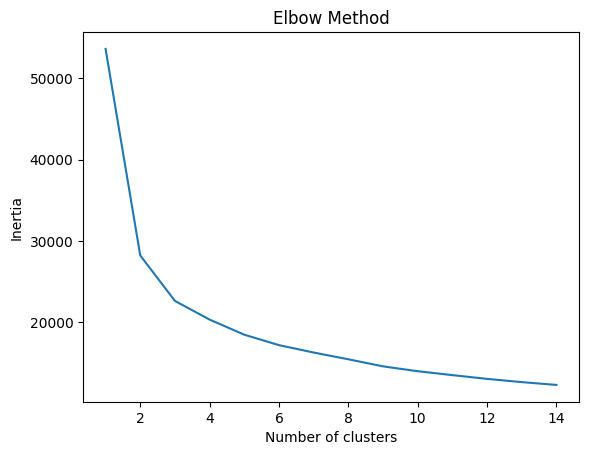

In [263]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_encoded)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_

plt.plot(range(1, 15), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

METHODS INDICATES THAT THE OPTIMAL NUMBER OF CLUSTERS IS 2

# 2 Clusters

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.40199306188771083
Davies-Bouldin Index: 0.9971197427919947
Percentage of MAKE_CHEVROLET in each cluster:


,Cluster,Percentage
0,1,73.429403
1,2,26.570597


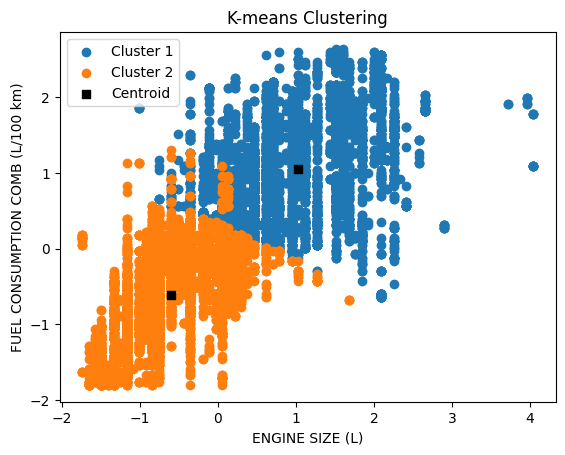

Percentage of MAKE_FORD in each cluster:


,Cluster,Percentage
0,1,66.690166
1,2,33.309834


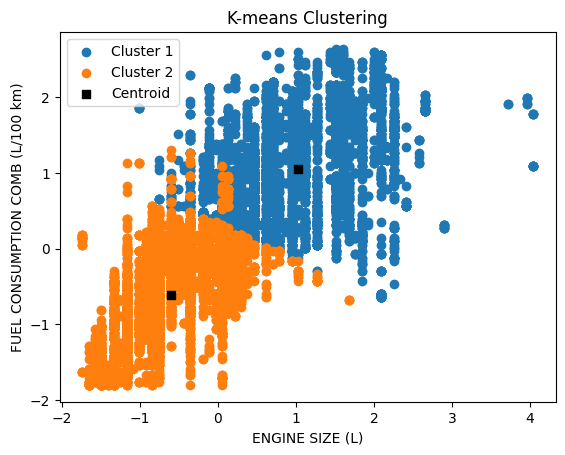

Percentage of MAKE_GMC in each cluster:


,Cluster,Percentage
0,1,91.983964
1,2,8.016036


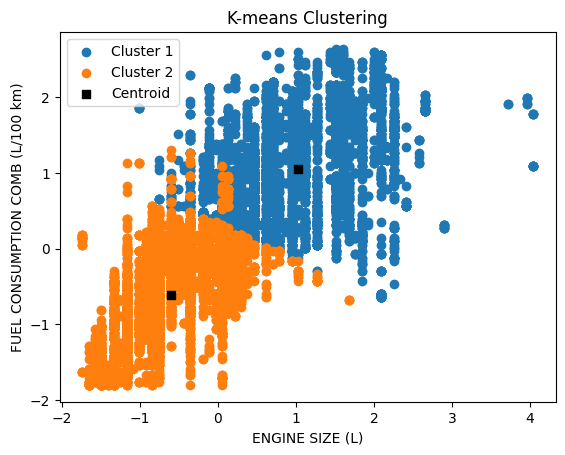

Percentage of MAKE_HONDA in each cluster:


,Cluster,Percentage
0,1,11.259308
1,2,88.740692


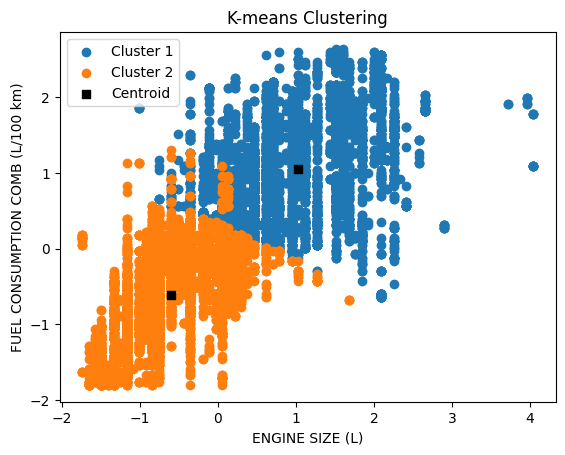

Percentage of MAKE_HYUNDAI in each cluster:


,Cluster,Percentage
0,1,10.072469
1,2,89.927531


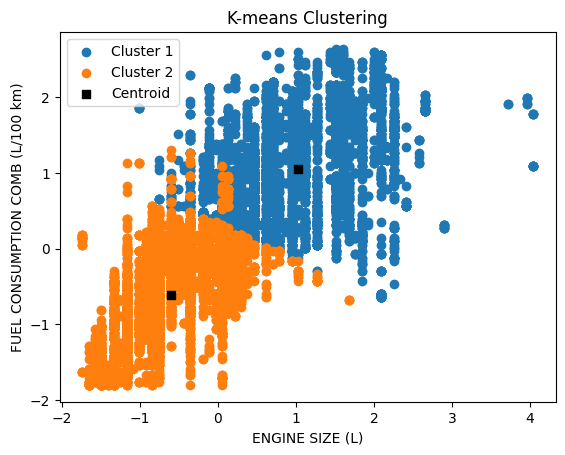

Percentage of MAKE_KIA in each cluster:


,Cluster,Percentage
0,1,17.030866
1,2,82.969134


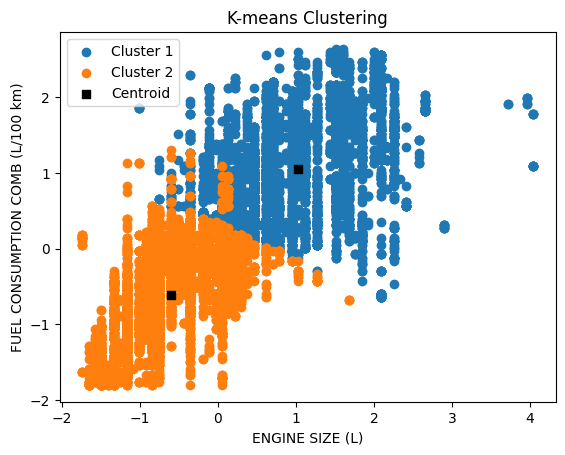

Percentage of MAKE_MAZDA in each cluster:


,Cluster,Percentage
0,1,24.3727
1,2,75.6273


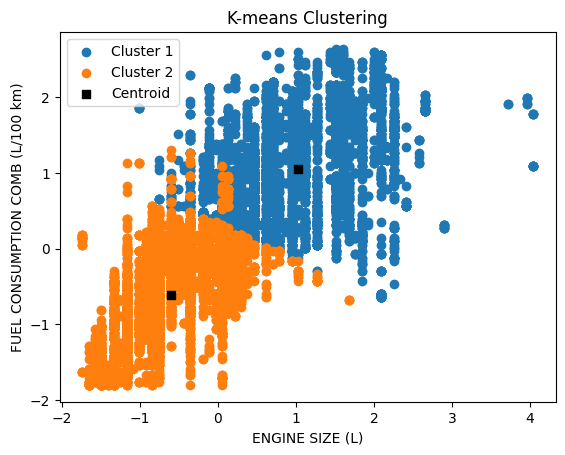

Percentage of MAKE_NISSAN in each cluster:


,Cluster,Percentage
0,1,46.006628
1,2,53.993372


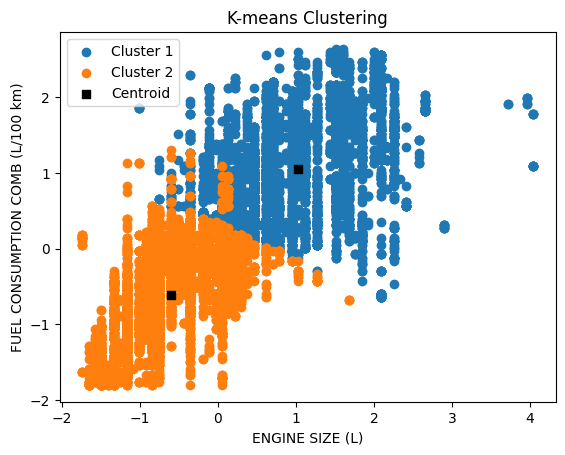

Percentage of MAKE_OTHER in each cluster:


,Cluster,Percentage
0,1,44.568442
1,2,55.431558


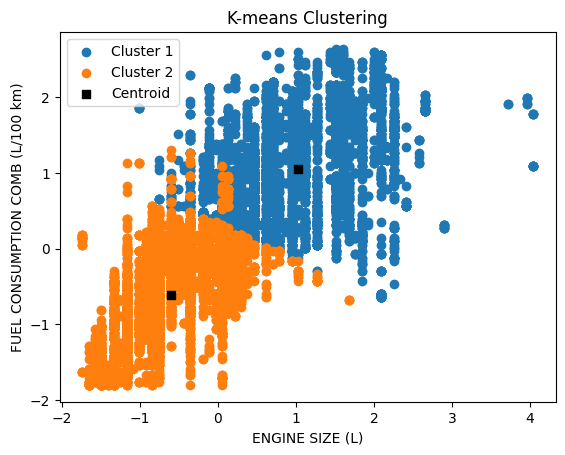

Percentage of MAKE_TOYOTA in each cluster:


,Cluster,Percentage
0,1,44.181566
1,2,55.818434


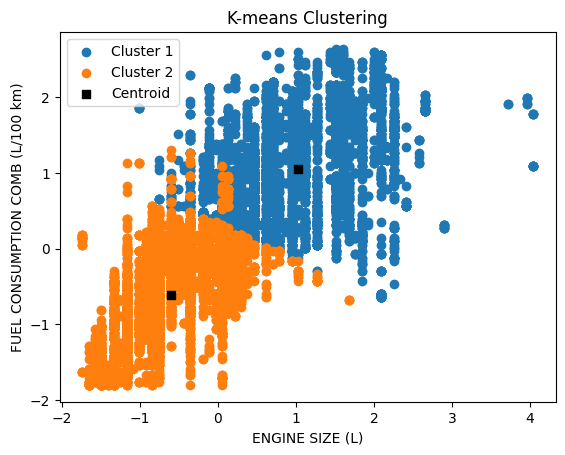

Percentage of MAKE_VOLKSWAGEN in each cluster:


,Cluster,Percentage
0,1,11.293094
1,2,88.706906


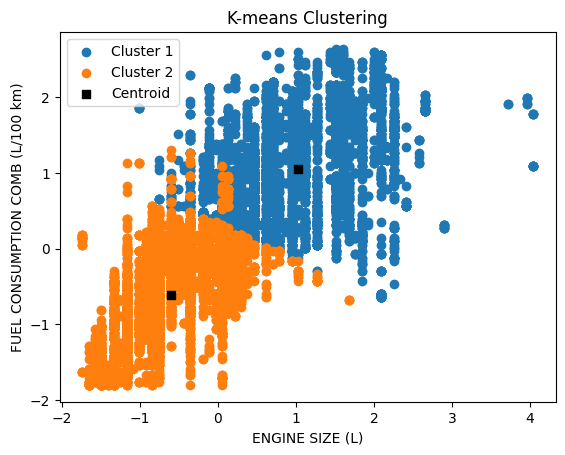

In [265]:
cluster_number = 2
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

make_columns = [col for col in df_encoded.columns if col.startswith('MAKE')]

make_percentage_dict = {}

for make_col in make_columns:

    make_percentage = pd.DataFrame(index=range(cluster_number), columns=['Cluster', 'Percentage'])

    for cluster_label in range(cluster_number):
        cluster_points = df_encoded[labels == cluster_label]
        plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label+1}')
        total_points_in_cluster = len(cluster_points)
        total_make_in_cluster = len(cluster_points[cluster_points[make_col] == 1])
        make_percent_in_cluster = (total_make_in_cluster / total_points_in_cluster) * 100

        make_percentage.at[cluster_label, 'Cluster'] = cluster_label + 1
        make_percentage.at[cluster_label, 'Percentage'] = make_percent_in_cluster

    total_percentage = make_percentage['Percentage'].sum()
    make_percentage['Percentage'] = make_percentage['Percentage'] / total_percentage * 100

    make_percentage_dict[make_col] = make_percentage

    print(f"Percentage of {make_col} in each cluster:")
    display(make_percentage)

    # Plotting the clusters
    #scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], marker='s', c='black', label='Centroid')
    plt.title('K-means Clustering')
    plt.xlabel(df_encoded.columns[0])
    plt.ylabel(df_encoded.columns[1])
    plt.legend()
    plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.40199306188771083
Davies-Bouldin Index: 0.9971197427919947


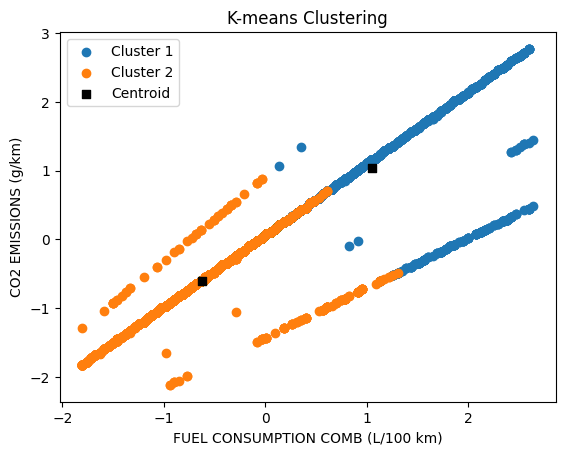

In [267]:
cluster_number = 2
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.40199306188771083
Davies-Bouldin Index: 0.9971197427919947


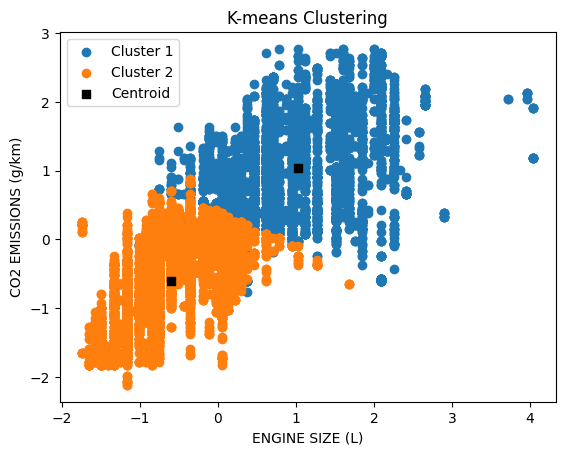

In [268]:
cluster_number = 2
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

# 4 Clusters

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.21509341947777466
Davies-Bouldin Index: 1.533327740174942


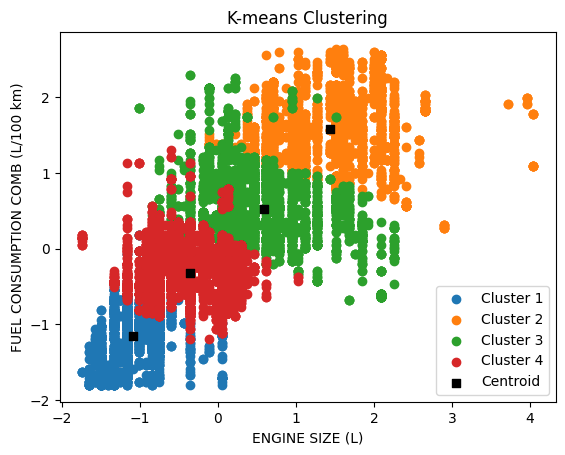

In [269]:
cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.21426969139388527
Davies-Bouldin Index: 1.5330407069049654


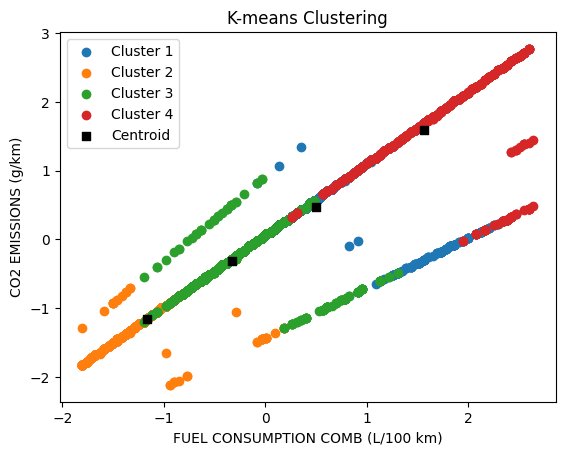

In [270]:
cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.21416381374961577
Davies-Bouldin Index: 1.5332228160369121


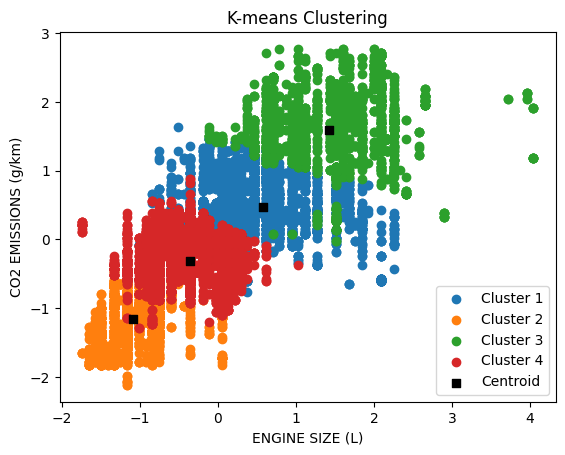

In [271]:
cluster_number = 4
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

# 5 Clusters

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.23438696261354433
Davies-Bouldin Index: 1.4421360711574047


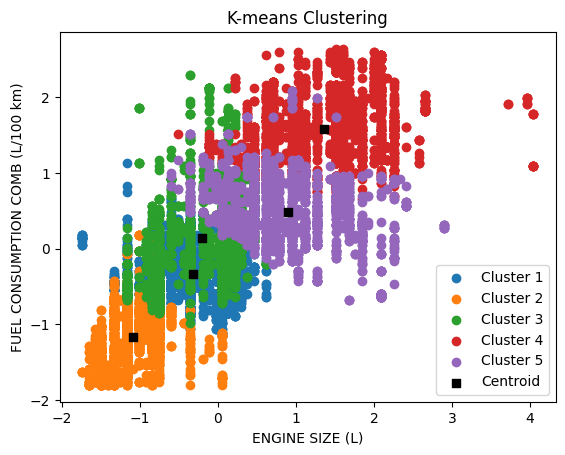

In [272]:
cluster_number = 5
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.23440956716691283
Davies-Bouldin Index: 1.4389828332398


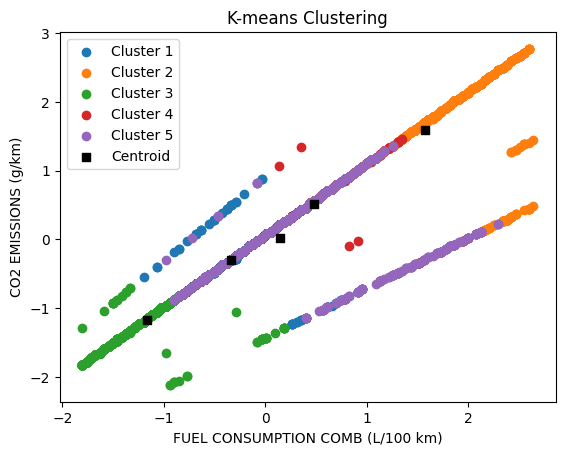

In [273]:
cluster_number = 5
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 1], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

c:\Users\gabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.23521216110515963
Davies-Bouldin Index: 1.4463149324597129


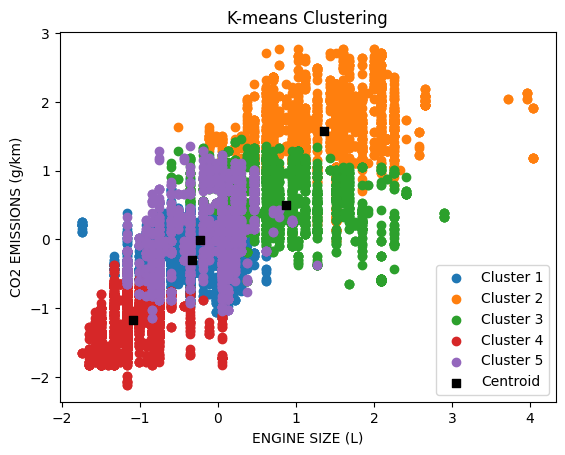

'\nmake_columns = [col for col in df_encoded.columns if col.startswith(\'MAKE\')]\n\n# Create an empty dictionary to store the percentage DataFrames for each make\nmake_percentage_dict = {}\n\n# Iterate over each make column\nfor make_col in make_columns:\n    # Preallocate space for the DataFrame\n    make_percentage = pd.DataFrame(index=range(cluster_number), columns=[\'Cluster\', \'Percentage\'])\n\n    for cluster_label in range(cluster_number):\n        cluster_points = df_encoded[labels == cluster_label]\n        total_points_in_cluster = len(cluster_points)\n        total_make_in_cluster = len(cluster_points[cluster_points[make_col] == 1])\n        make_percent_in_cluster = (total_make_in_cluster / total_points_in_cluster) * 100\n        # Set values for each row directly\n        make_percentage.at[cluster_label, \'Cluster\'] = cluster_label + 1\n        make_percentage.at[cluster_label, \'Percentage\'] = make_percent_in_cluster\n\n    # Normalize percentages to ensure they sum

In [274]:
cluster_number = 5
kmeans = KMeans(n_clusters=cluster_number)
kmeans.fit(df_encoded)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2], label=f'Cluster {cluster_label+1}')

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('K-means Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

# Birch Clustering

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.3696680050888313
Davies-Bouldin Index: 1.0641046120777649


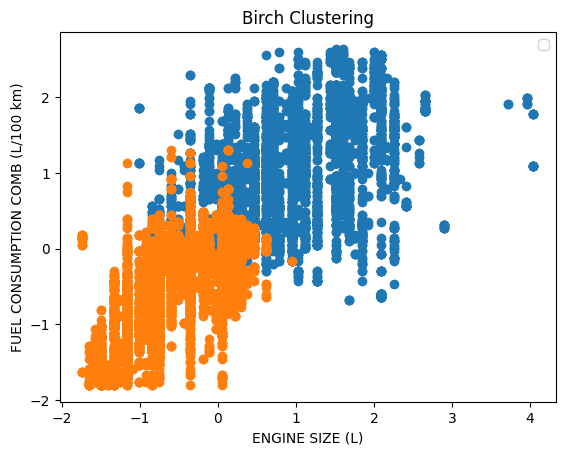

In [284]:
cluster_number = 2
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.3696680050888313
Davies-Bouldin Index: 1.0641046120777649


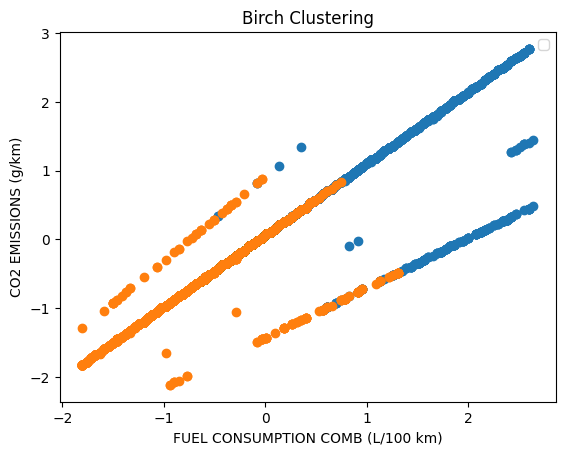

In [285]:
cluster_number = 2
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.3696680050888313
Davies-Bouldin Index: 1.0641046120777649


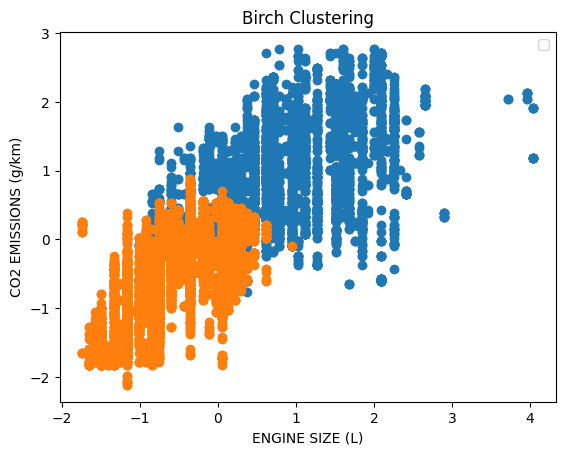

In [286]:
cluster_number = 2
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

# 4 Clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.2699040587781292
Davies-Bouldin Index: 1.4119825419764114


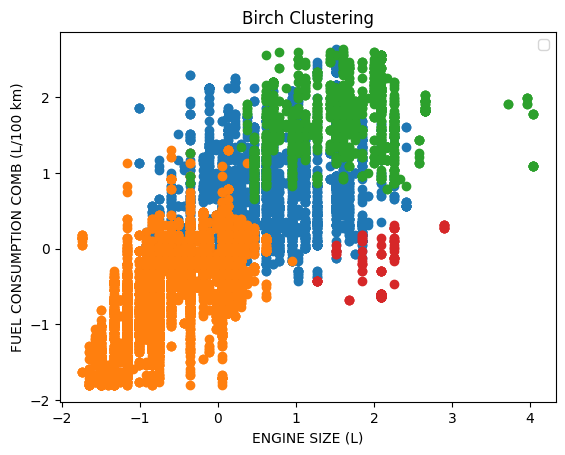

In [287]:
cluster_number = 4
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.2699040587781292
Davies-Bouldin Index: 1.4119825419764114


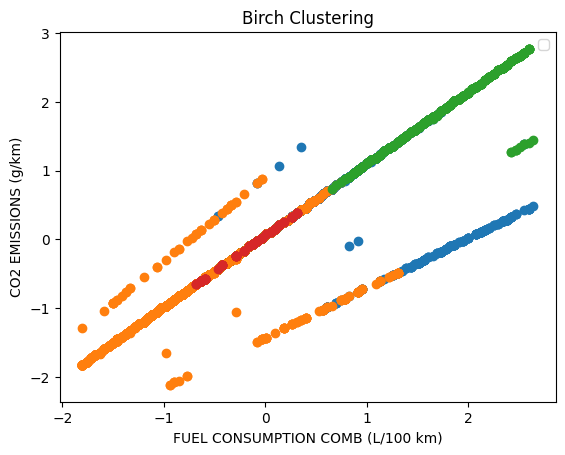

In [288]:
cluster_number = 4
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.2699040587781292
Davies-Bouldin Index: 1.4119825419764114


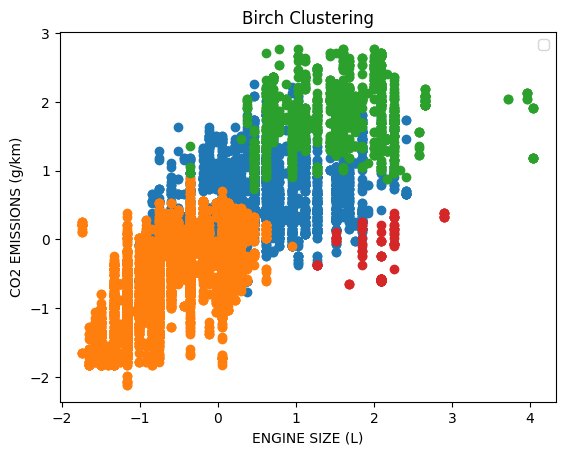

In [289]:
cluster_number = 4
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

# 5 Clusters

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.26968907659500757
Davies-Bouldin Index: 1.5448344293679086


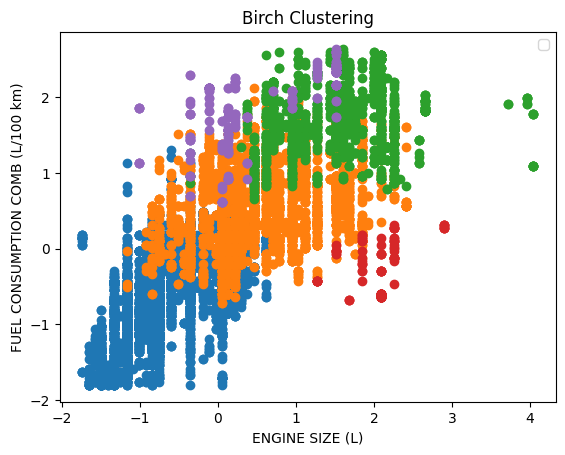

In [290]:
cluster_number = 5
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 1])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[1])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.26968907659500757
Davies-Bouldin Index: 1.5448344293679086


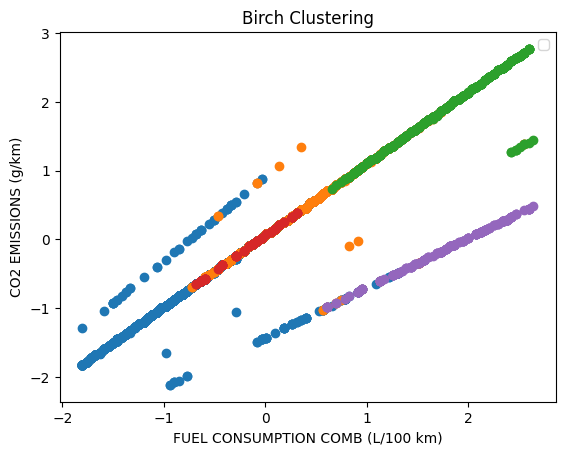

In [291]:
cluster_number = 5
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 1], cluster_points.iloc[:, 2])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[1])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Silhouette Score: 0.26968907659500757
Davies-Bouldin Index: 1.5448344293679086


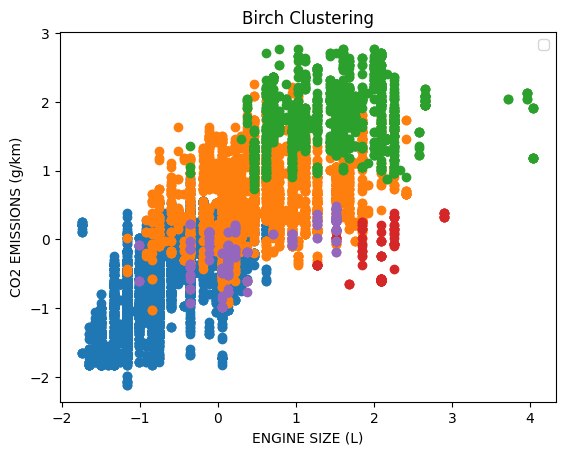

In [292]:
cluster_number = 5
value = 0.5
birch = Birch(threshold = value, n_clusters=cluster_number)
birch.fit(df_encoded)
labels = birch.labels_
#centers = birch.subcluster_centers_

# Silhouette Score
sil_score = silhouette_score(df_encoded, labels)
print(f"Silhouette Score: {sil_score}")
dbi = davies_bouldin_score(df_encoded, labels)
print(f'Davies-Bouldin Index: {dbi}')

for cluster_label in range(cluster_number):
    cluster_points = df_encoded[labels == cluster_label]
    plt.scatter(cluster_points.iloc[:, 0], cluster_points.iloc[:, 2])

# Plotting the clusters
#scatter = plt.scatter(df_encoded.iloc[:, 0], df_encoded.iloc[:, 1], c=labels)
#plt.scatter(centers[:, 0], centers[:, 2], marker='s', c='black', label='Centroid')
plt.title('Birch Clustering')
plt.xlabel(df_encoded.columns[0])
plt.ylabel(df_encoded.columns[2])
plt.legend()
plt.show()